In [2]:
import gpt_wrapper
import os
from gpt_wrapper.chat import Chat
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from transformers import AutoTokenizer, AutoModelForCausalLM
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import json

gpt_wrapper.api_base = ""
gpt_wrapper.api_key = ""

In [3]:
with open("data/heat_pump_questions (1).json", "r") as f:
    questions = json.load(f)

with open("answers/heat_pump_answers_DPO.json", "r") as f:
    data_dpo = json.load(f)

with open("answers/ppo_heat_pump_answers.json", "r") as f:
    data_ppo = json.load(f)
with open("answers/heat_pump_answers_post_ML.json", "r") as f:
    data_sft = json.load(f)

In [4]:
questions = questions["questions"]
answers_sft = data_sft["answers"]
answers_ppo = data_ppo["answers"]
answers_dpo = data_dpo["answers"]

In [19]:
chat = Chat.create("Evaluation chat")
q = questions[0]
a1 = answers_sft[0]
a2 = answers_ppo[0]
a3 = answers_dpo[0]
prompt = "Given this question: "  + q + " and the following answers: 1) +  " + a1 + "  2) " + a2 + " 3) " + a3 + " Choose the preferred answer outputting an integer (1, 2 or 3) corresponding to the answrer. Judge the answers based on correctness, clarity, and completeness."
evaluation = chat.ask(content  = prompt, instruction = "Answer with a single integer. Do not give an explanation.")
print(str(evaluation))

1


In [11]:
results = []
for i in range(len(questions)):
    chat = Chat.create("Evaluation chat")
    q = questions[i]
    a1 = answers_sft[i]
    a2 = answers_ppo[i]
    a3 = answers_dpo[i]  
    prompt = "Given this question: "  + q + " and the following answers: 1) +  " + a1 + " 2) " + a2 + " 3) " + a3 + " Choose the preferred answer outputting an integer 1, 2 or 3) corresponding to the answrer. Judge the answers based on correctness, clarity, and completeness."
    evaluation = chat.ask(content  = prompt, instruction = "Answer with a single integer. Do not give an explanation.")
    results.append(int(str(evaluation)))

In [12]:
# print frequencies of each preference
print("SFT: ", results.count(1))
print("PPO: ", results.count(2))
print("DPO: ", results.count(3))

SFT:  24
PPO:  27
DPO:  49


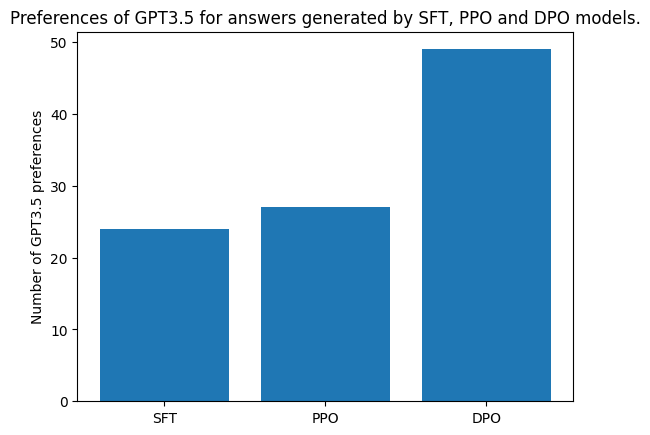

In [14]:
# bar plot of the results with nice labels
import matplotlib.pyplot as plt
import numpy as np
labels = ['SFT', 'PPO', 'DPO']
values = [results.count(1), results.count(2), results.count(3)]
plt.bar(labels, values)
plt.ylabel('Number of GPT3.5 preferences')
plt.title('Preferences of GPT3.5 for answers generated by SFT, PPO and DPO models.')

plt.show()


